In [1]:
import pandas as pd

# df = pd.read_csv("C://Users//Zhaokai//Desktop//CIND820_capstone//project_github_repo//CIND820_capstone//data//raw//Crash_Reporting_Drivers_Data.csv")
df = pd.read_csv("../../data/raw/Crash_Reporting_Drivers_Data.csv")

# look at first few 5 rows of dataset
df.head()

C:\Users\Zhaokai\AppData\Local\Temp\ipykernel_16652\1438613043.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/raw/Crash_Reporting_Drivers_Data.csv")


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [2]:
# number of rows, number of columns for dataset
nrow,ncol=df.shape
nrow,ncol

(159357, 43)

In [3]:
# We have following data types of variables float64(2), int64(2), object(39). 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159357 entries, 0 to 159356
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   159357 non-null  object 
 1   Local Case Number               159357 non-null  object 
 2   Agency Name                     159357 non-null  object 
 3   ACRS Report Type                159357 non-null  object 
 4   Crash Date/Time                 159357 non-null  object 
 5   Route Type                      143710 non-null  object 
 6   Road Name                       144586 non-null  object 
 7   Cross-Street Type               143684 non-null  object 
 8   Cross-Street Name               144577 non-null  object 
 9   Off-Road Description            14769 non-null   object 
 10  Municipality                    17700 non-null   object 
 11  Related Non-Motorist            5019 non-null    object 
 12  Collision Type  

In [5]:
# according to the output of last code section df.info(), we will remove columns with small amount of non-null count values
new_df=df.drop(["Off-Road Description","Municipality","Related Non-Motorist","Non-Motorist Substance Abuse","Circumstance"],axis=1)

# we will also remove "Driverless Vehicle", according to its values distribution below, we can tell this column is meaningless.
# df["Driverless Vehicle"].value_counts()
# No         158668
# Unknown       689
# Name: Driverless Vehicle, dtype: int64
new_df=new_df.drop(["Driverless Vehicle"],axis=1)

# we also remove columns that are not related to this study:"Report Number", "Local Case Number", "Agency Name","Person ID", "Vehicle ID","Latitude","Longitude"
new_df=new_df.drop(["Road Name","Cross-Street Type","Cross-Street Name","Report Number","Local Case Number","Agency Name",
        "Person ID", "Drivers License State","Vehicle ID","Latitude","Longitude"],axis=1)

new_df.info()
#new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159357 entries, 0 to 159356
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ACRS Report Type                159357 non-null  object
 1   Crash Date/Time                 159357 non-null  object
 2   Route Type                      143710 non-null  object
 3   Collision Type                  158820 non-null  object
 4   Weather                         146879 non-null  object
 5   Surface Condition               140664 non-null  object
 6   Light                           158035 non-null  object
 7   Traffic Control                 135447 non-null  object
 8   Driver Substance Abuse          130386 non-null  object
 9   Driver At Fault                 159357 non-null  object
 10  Injury Severity                 159357 non-null  object
 11  Driver Distracted By            159357 non-null  object
 12  Vehicle Damage Extent         

In [32]:
new_df = new_df.drop(['test'],axis=1)

In [35]:
# summary statistics for numeric attributes
new_df.describe()

# Although "Speed Limit" attribute is a numeric attribute
# The data is organized as categorical. 
# We will reduce levels from 15 to 5. 
# print(new_df["Speed Limit"].value_counts())
# new_df[new_df["Speed Limit"] == 0]
levels = ['0-10','15-25','30-40','45-55','60-70']

bins = [0, 10, 25, 40, 55, 70]

# new_df["Speed Limit"] = pd.cut(new_df['Speed Limit'], bins= bins,labels=levels)

new_df["Speed Limit"] = new_df["Speed Limit"].astype("category")

new_df["Speed Limit"].value_counts()

print(new_df["Speed Limit"].dtypes)





category


In [ ]:
# The vehicle year between 1960 and 2024 is considered as valid data entry. 
# The total size of the data minus the size of the valid entry equals to the number of the rows which will be removed 
# Output is 3877, and it is a reasonable amount of rows to remove.
print(len(new_df) - len(new_df[(new_df["Vehicle Year"]>=1960) & (new_df["Vehicle Year"]<=2024)]))

# To remove the rows do not fall into the range.
new_df = new_df.loc[(new_df["Vehicle Year"] >= 1960) & (new_df["Vehicle Year"] <= 2024)]

In [ ]:
# use this before you print large amount of data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# after we completed feature selection at later stage, we will deal with rows with missing values


0.1844977001324071

In [15]:
# Count the occurrences of each unique value in the class attribute "Injury Severity"
new_df["Injury Severity"].value_counts()



0    130578
1     27325
2      1454
Name: Injury Severity, dtype: int64

In [9]:
# according to the output of last code section, 130578(NO APPARENT INJURY)/159357(total rows) = 81.9% 
# we can tell that the multi-class problem has imbalanced class distributions. reducing number of classes could help address the issue. we will deal with
# imbalanced class distributions later.
# A large number of classes can increase the complexity of the classification problem, by reducing the number of classes, we can simplify the problem
# and make it more manageable for the model to learn the distinguishing features, which may lead to better performance.

# for target variable "Injury Severity", convert 5 classes to 3 classes
new_df["Injury Severity"]=new_df["Injury Severity"].map({"NO APPARENT INJURY":0,"POSSIBLE INJURY":1,"SUSPECTED MINOR INJURY":1,"SUSPECTED SERIOUS INJURY":2,
                                             "FATAL INJURY":2})
new_df["Injury Severity"].value_counts()

0    130578
1     27325
2      1454
Name: Injury Severity, dtype: int64

<AxesSubplot:>

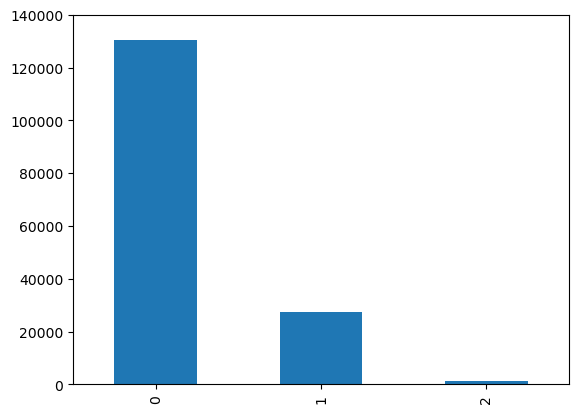

In [10]:
# Univariate visualization for class attribute
class_counts = new_df["Injury Severity"].value_counts()
class_counts.plot.bar(ylim=[0,140000])


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159357 entries, 0 to 159356
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ACRS Report Type                159357 non-null  object
 1   Crash Date/Time                 159357 non-null  object
 2   Route Type                      143710 non-null  object
 3   Collision Type                  158820 non-null  object
 4   Weather                         146879 non-null  object
 5   Surface Condition               140664 non-null  object
 6   Light                           158035 non-null  object
 7   Traffic Control                 135447 non-null  object
 8   Driver Substance Abuse          130386 non-null  object
 9   Driver At Fault                 159357 non-null  object
 10  Injury Severity                 159357 non-null  int64 
 11  Driver Distracted By            159357 non-null  object
 12  Vehicle Damage Extent         

In [8]:
new_df["Injury Severity"].value_counts()

NO APPARENT INJURY          130578
POSSIBLE INJURY              16219
SUSPECTED MINOR INJURY       11106
SUSPECTED SERIOUS INJURY      1310
FATAL INJURY                   144
Name: Injury Severity, dtype: int64

In [25]:
df2=new_df.drop(["Injury Severity"],axis=1)

In [11]:
import dython as dy
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

associations(new_df)

# ValueError: negative dimensions are not allowed


c:\Users\Zhaokai\miniconda3\lib\site-packages\pandas\core\reshape\reshape.py:126: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

ValueError: Unable to coerce list of <class 'pandas.core.series.Series'> to Series/DataFrame